In [1]:
import networkx as nx
from sage.all import Graph
import time
from decimal import Decimal
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# inputs
graphs = []

q_graph = nx.Graph()
q_graph.add_nodes_from([1,2,3,4,5,6,7,8])
q_graph.add_edges_from([(1,2), (2,3), (2,4), (3,4), (3,5), (4,5), (5,6), (5,7), (6,8), (7,8)])
graphs.append(q_graph)


for i in range(100):
    graphs.append(nx.random_lobster(10, 0.5, 0.2))

for i in range(100):
    graphs.append(nx.random_lobster(100, 0.5, 0.2))
    
for i in range(30):
    graphs.append(nx.random_lobster(1000, 0.5, 0.2))

In [3]:
# Pre processing
def return_max_cliques(G):
    cliques = []
    for clique in nx.find_cliques(G):
        cliques.append(tuple(clique))
    return cliques

def create_graph(cliques):
    G_Prime = nx.Graph()
    G_Prime.add_nodes_from(cliques)
    return G_Prime

def draw(graph):
    nx.draw(graph, with_labels=True)
    
def connect_clique_nodes(G_Prime):
    nodes_prime = list(G_Prime.nodes)
    n = len(nodes_prime)
    for i in range(n-1):
        for j in range(i+1, n):
            if(set(nodes_prime[i]) & set(nodes_prime[j])):
                G_Prime.add_edge(nodes_prime[i], nodes_prime[j])


In [4]:
time_g = []

time_ilp = []

cliques_len = []
for graph in graphs:
    num_nodes = graph.number_of_nodes()
    if num_nodes == 0:
        continue
    
    cliques = return_max_cliques(graph)
    G_Prime = create_graph(cliques)
    connect_clique_nodes(G_Prime)
    
    st_g = time.time()
    colors = nx.coloring.greedy_color(G_Prime, strategy='DSATUR')
    
    et_g = time.time()
    te_g = Decimal(et_g) - Decimal(st_g)
    colors = len(set(colors.values()))
    fd_g = colors/num_nodes
    
    
    # ILP
    ilp_g = Graph(G_Prime)
    st_ilp = time.time()
    n = ilp_g.fractional_chromatic_number()
    et_ilp = time.time()
    te_ilp = Decimal(et_ilp) - Decimal(st_ilp)
    fd_ilp = float(n/num_nodes)
    
    print("Number of cliques = ", len(cliques))
    print("Greedy FD = ", fd_g, " ILP FD = ", fd_ilp)
    print("Time Greedy = ", round(te_g, 4), " ILP = ", round(te_ilp, 4))
    print("---------------------")
    time_g.append(te_g)
    time_ilp.append(te_ilp)
    cliques_len.append(len(cliques))
    

Number of cliques =  7
Greedy FD =  0.375  ILP FD =  0.375
Time Greedy =  0.0003  ILP =  0.043
---------------------
Number of cliques =  19
Greedy FD =  0.25  ILP FD =  0.25
Time Greedy =  0.0004  ILP =  0.0026
---------------------
Number of cliques =  2
Greedy FD =  0.6666666666666666  ILP FD =  0.6666666666666666
Time Greedy =  0.0  ILP =  0.0
---------------------
Number of cliques =  44
Greedy FD =  0.17777777777777778  ILP FD =  0.17777777777777778
Time Greedy =  0.002  ILP =  0.0084
---------------------
Number of cliques =  10
Greedy FD =  0.45454545454545453  ILP FD =  0.45454545454545453
Time Greedy =  0.0001  ILP =  0.0019
---------------------
Number of cliques =  16
Greedy FD =  0.4117647058823529  ILP FD =  0.4117647058823529
Time Greedy =  0.0003  ILP =  0.0029
---------------------
Number of cliques =  32
Greedy FD =  0.15151515151515152  ILP FD =  0.15151515151515152
Time Greedy =  0.0011  ILP =  0.0058
---------------------
Number of cliques =  22
Greedy FD =  0.2608

---------------------
Number of cliques =  25
Greedy FD =  0.2692307692307692  ILP FD =  0.2692307692307692
Time Greedy =  0.0007  ILP =  0.0045
---------------------
Number of cliques =  18
Greedy FD =  0.3157894736842105  ILP FD =  0.3157894736842105
Time Greedy =  0.0004  ILP =  0.0031
---------------------
Number of cliques =  15
Greedy FD =  0.25  ILP FD =  0.25
Time Greedy =  0.0003  ILP =  0.0025
---------------------
Number of cliques =  42
Greedy FD =  0.16279069767441862  ILP FD =  0.16279069767441862
Time Greedy =  0.0019  ILP =  0.0078
---------------------
Number of cliques =  20
Greedy FD =  0.2857142857142857  ILP FD =  0.2857142857142857
Time Greedy =  0.0005  ILP =  0.0029
---------------------
Number of cliques =  5
Greedy FD =  0.6666666666666666  ILP FD =  0.6666666666666666
Time Greedy =  0.0001  ILP =  0.0008
---------------------
Number of cliques =  22
Greedy FD =  0.391304347826087  ILP FD =  0.391304347826087
Time Greedy =  0.0006  ILP =  0.0043
--------------

Number of cliques =  396
Greedy FD =  0.017632241813602016  ILP FD =  0.017632241813602016
Time Greedy =  0.1504  ILP =  0.0634
---------------------
Number of cliques =  361
Greedy FD =  0.024861878453038673  ILP FD =  0.024861878453038673
Time Greedy =  0.1228  ILP =  0.0591
---------------------
Number of cliques =  78
Greedy FD =  0.0759493670886076  ILP FD =  0.0759493670886076
Time Greedy =  0.006  ILP =  0.0137
---------------------
Number of cliques =  11
Greedy FD =  0.4166666666666667  ILP FD =  0.4166666666666667
Time Greedy =  0.0002  ILP =  0.0018
---------------------
Number of cliques =  11
Greedy FD =  0.5833333333333334  ILP FD =  0.5833333333333334
Time Greedy =  0.0002  ILP =  0.0015
---------------------
Number of cliques =  407
Greedy FD =  0.02696078431372549  ILP FD =  0.02696078431372549
Time Greedy =  0.1603  ILP =  0.0746
---------------------
Number of cliques =  213
Greedy FD =  0.04205607476635514  ILP FD =  0.04205607476635514
Time Greedy =  0.0439  ILP = 

Number of cliques =  4098
Greedy FD =  0.0031715052451817514  ILP FD =  0.0031715052451817514
Time Greedy =  15.9119  ILP =  0.7336
---------------------
Number of cliques =  2157
Greedy FD =  0.005097312326227989  ILP FD =  0.005097312326227989
Time Greedy =  4.3635  ILP =  0.3779
---------------------
Number of cliques =  4301
Greedy FD =  0.00302185030218503  ILP FD =  0.00302185030218503
Time Greedy =  19.8055  ILP =  0.7718
---------------------
Number of cliques =  2837
Greedy FD =  0.004933051444679351  ILP FD =  0.004933051444679351
Time Greedy =  7.8611  ILP =  0.4993
---------------------
Number of cliques =  1871
Greedy FD =  0.00641025641025641  ILP FD =  0.00641025641025641
Time Greedy =  3.4444  ILP =  0.3747
---------------------
Number of cliques =  2070
Greedy FD =  0.004828585224529213  ILP FD =  0.004828585224529213
Time Greedy =  4.3844  ILP =  0.4107
---------------------
Number of cliques =  1870
Greedy FD =  0.008017103153393906  ILP FD =  0.008017103153393906
Ti

In [5]:
zipped_pairs_g = zip(cliques_len, time_g)
zipped_pairs_ilp = zip(cliques_len, time_ilp)
sorted_time_g = [x for _, x in sorted(zipped_pairs_g)]
cliques_len_sorted = sorted(cliques_len)
sorted_time_ilp = [x for _, x in sorted(zipped_pairs_ilp)]

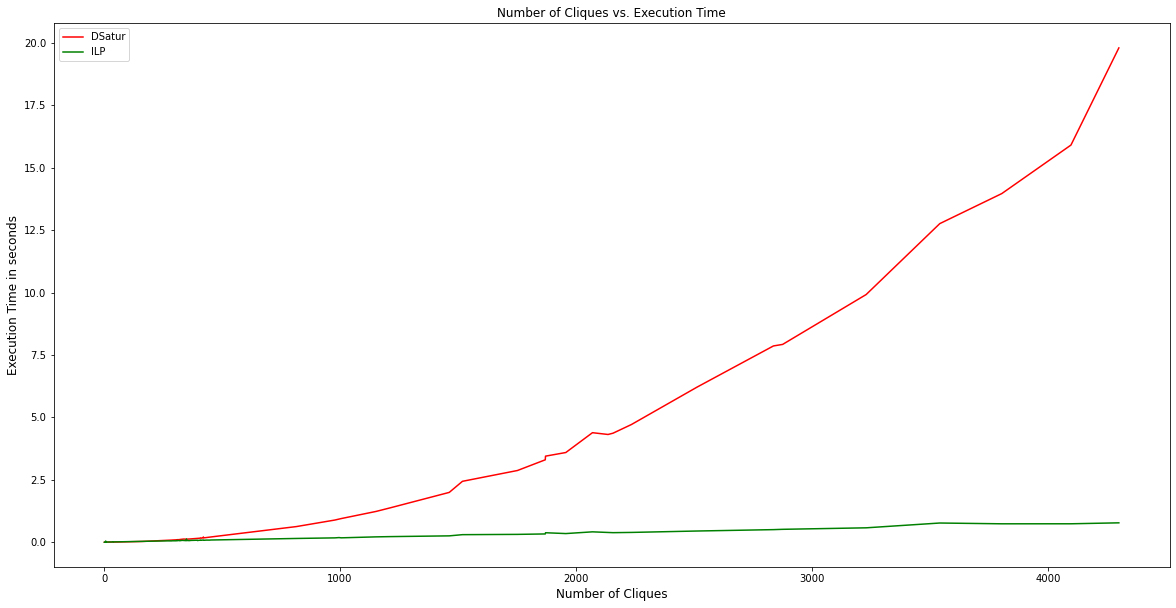

In [14]:
figure = plt.figure()
figure.set_figwidth(20)
figure.set_figheight(10)
plt.plot(cliques_len_sorted, sorted_time_g, color='red')
plt.plot(cliques_len_sorted, sorted_time_ilp, color='green')
plt.xlabel("Number of Cliques", fontsize="large")
plt.ylabel("Execution Time in seconds", fontsize="large")
plt.legend(["DSatur","ILP"], loc="upper left")
plt.title("Number of Cliques vs. Execution Time", fontsize="large")
plt.show()

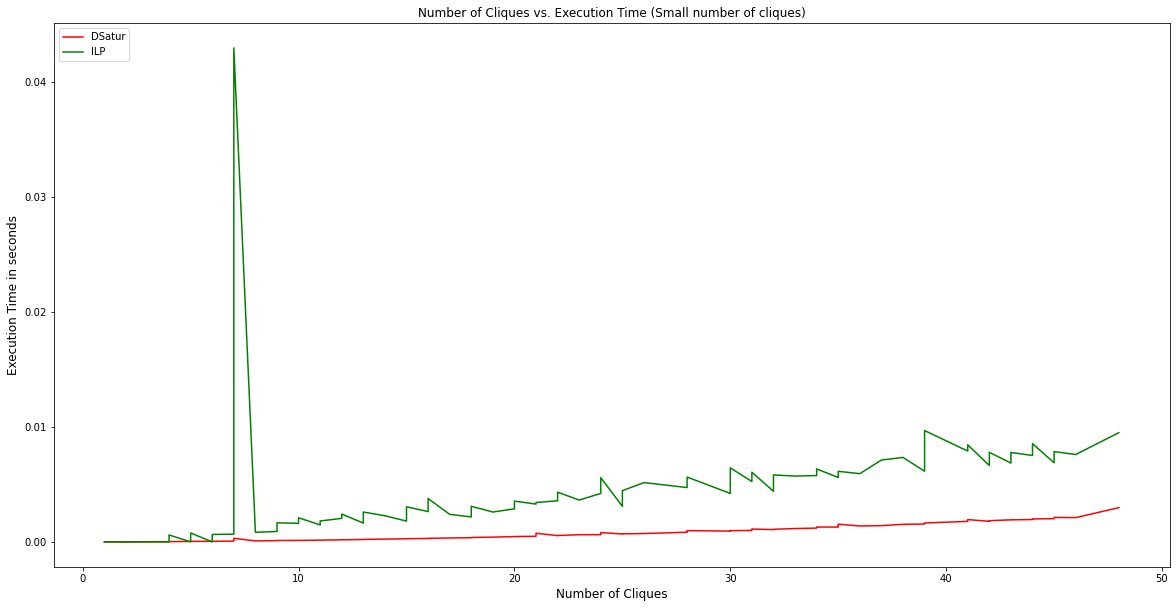

In [15]:
figure = plt.figure()
figure.set_figwidth(20)
figure.set_figheight(10)
plt.plot(cliques_len_sorted[:109], sorted_time_g[:109], color='red')
plt.plot(cliques_len_sorted[:109], sorted_time_ilp[:109], color='green')
plt.xlabel("Number of Cliques", fontsize="large")
plt.ylabel("Execution Time in seconds", fontsize="large")
plt.legend(["DSatur","ILP"], loc="upper left")
plt.title("Number of Cliques vs. Execution Time (Small number of cliques)", fontsize="large")
plt.show()

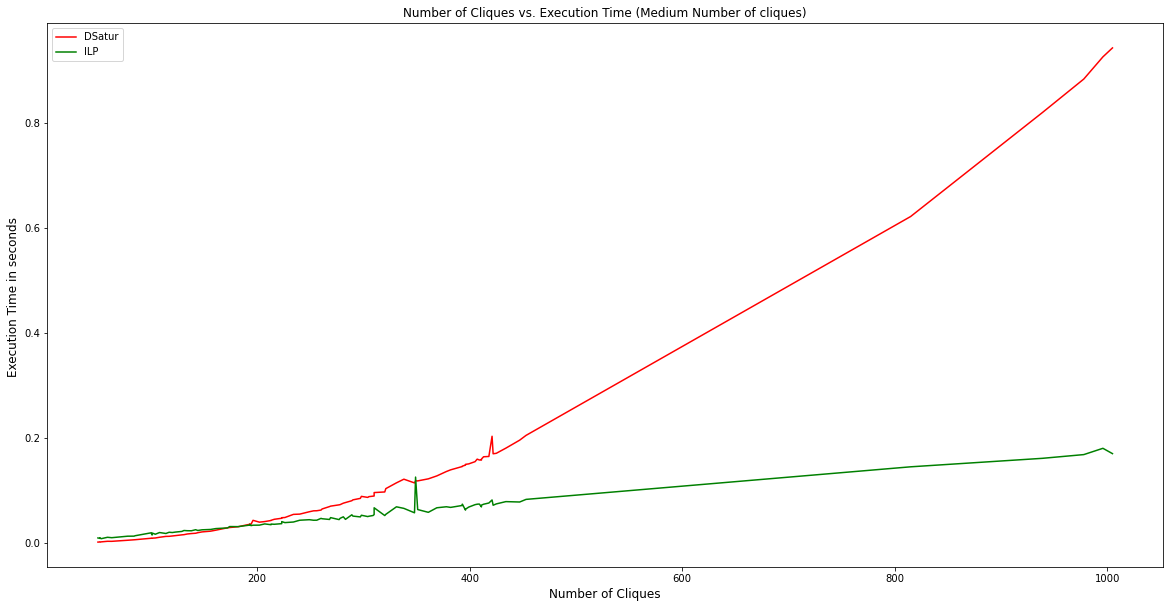

In [16]:
figure = plt.figure()
figure.set_figwidth(20)
figure.set_figheight(10)
plt.plot(cliques_len_sorted[109:209], sorted_time_g[109:209], color='red')
plt.plot(cliques_len_sorted[109:209], sorted_time_ilp[109:209], color='green')
plt.xlabel("Number of Cliques", fontsize="large")
plt.ylabel("Execution Time in seconds ", fontsize="large")
plt.legend(["DSatur","ILP"], loc="upper left")
plt.title("Number of Cliques vs. Execution Time (Medium Number of cliques)", fontsize="large")
plt.show()

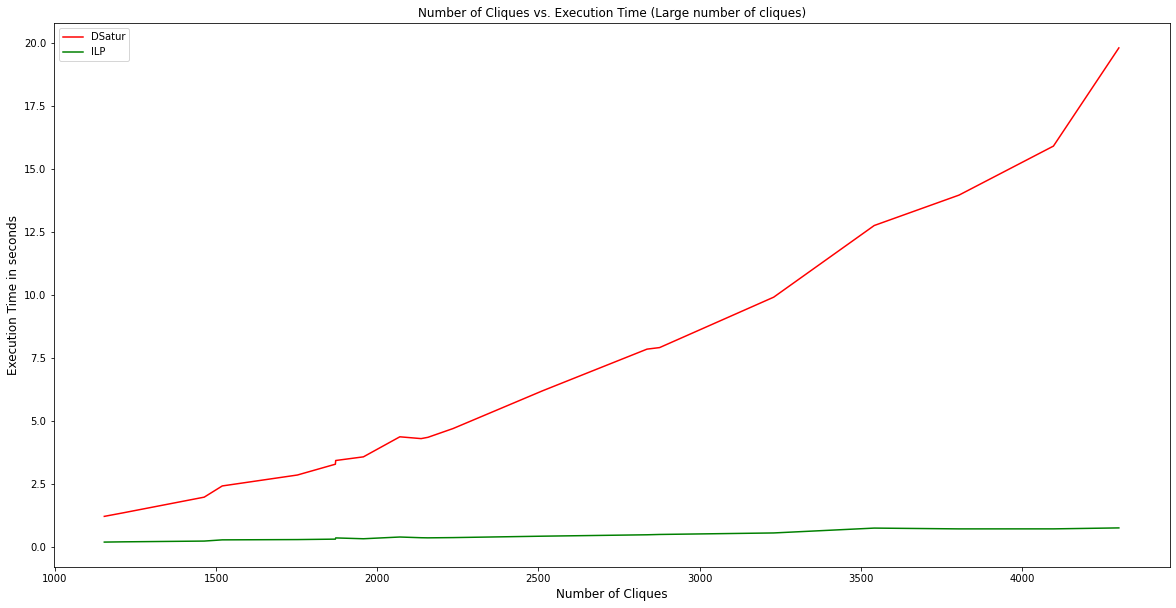

In [17]:
figure = plt.figure()
figure.set_figwidth(20)
figure.set_figheight(10)
plt.plot(cliques_len_sorted[209:], sorted_time_g[209:], color='red')
plt.plot(cliques_len_sorted[209:], sorted_time_ilp[209:], color='green')
plt.xlabel("Number of Cliques", fontsize="large")
plt.ylabel("Execution Time in seconds", fontsize="large")
plt.legend(["DSatur","ILP"], loc="upper left")
plt.title("Number of Cliques vs. Execution Time (Large number of cliques)", fontsize="large")
plt.show()